In [48]:
import pandas as pd
import numpy as np
import datetime
from pandas_datareader import data
import statsmodels
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
%matplotlib inline

Looking for Cointegrated Pairs of Alternative Energy Securities:
I'm looking through a set of solar company stocks to see if any of them are cointegrated. We'll start by defining the list of securities we want to look through. Then we'll get the pricing data for each security for the year of 2014.

Note:
We include the market in our data. This is because the market drives the movement of so many securities that you often times might find two seemingingly cointegrated securities, but in reality they are not cointegrated and just both conintegrated with the market. This is known as a confounding variable and it is important to check for market involvement in any relationship you find.

In [15]:
symbol_list = ['ABGB', 'ASTI', 'CSUN', 'DQ', 'FSLR','SPY']

In [31]:
prices_df = data.DataReader(symbol_list, 'yahoo', '2014-01-01', '2015-01-01')['Adj Close']

In [40]:
prices_df.head(10)

,ABGB,ASTI,CSUN,DQ,FSLR,SPY
Date,,,,,,
2014-01-02,13.503233,7.3,7.09,38.000000,57.439999,173.980006
2014-01-03,13.812252,7.3,7.08,39.090000,56.740002,173.951473
2014-01-06,14.355378,7.1,7.00,40.049999,51.259998,173.447378
2014-01-07,14.636306,7.3,6.93,41.930000,52.490002,174.512634
2014-01-08,14.336650,7.1,7.17,42.380001,51.680000,174.550688
2014-01-09,14.608213,7.1,7.10,39.950001,52.110001,174.664818
2014-01-10,14.954690,7.3,7.04,39.700001,51.970001,175.140381
2014-01-13,15.151339,7.2,6.33,38.540001,49.860001,172.810125
2014-01-14,15.750650,7.3,6.50,40.200001,51.049999,174.693351


In [35]:
prices_df.columns

Index(['ABGB', 'ASTI', 'CSUN', 'DQ', 'FSLR', 'SPY'], dtype='object')

In [41]:
S1 = prices_df['ABGB']
S2 = prices_df['FSLR']

In [46]:
score, pvalue, _ = coint(S1, S2)
pvalue

0.0043696772165590682

In [47]:
prices_df.keys()

Index(['ABGB', 'ASTI', 'CSUN', 'DQ', 'FSLR', 'SPY'], dtype='object')

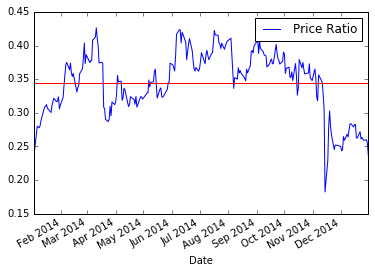

In [50]:
ratios = S1/S2
ratios.plot()
plt.axhline(ratios.mean(), color = 'red')
plt.legend(["Price Ratio"])

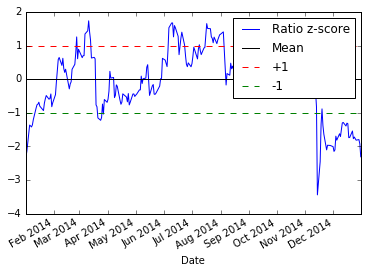

In [51]:
def zscore(series):
    return (series - series.mean()) / np.std(series)
zscore(ratios).plot()
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1']);

#### Simple Strategy:
Go "Long" the ratio whenever the z-score is below -1.0
Go "Short" the ratio when the z-score is above 1.0
Exit positions when the z-score approaches zero

#### Trading using constantly updating statistics¶
In general taking a statistic over your whole sample size can be bad. For example, if the market is moving up, and both securities with it, then your average price over the last 3 years may not be representative of today. For this reason traders often use statistics that rely on rolling windows of the most recent data.